In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import importlib
import datetime as dt
from datetime import datetime

from pandas import concat

from math import sqrt

from sklearn import preprocessing

from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn import preprocessing as prep
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [21]:
# date_format="%m/%d/%Y %H:%M"
# date_parse = lambda date: dt.datetime.strptime(date, date_format)
# data = pd.read_csv("C:/Users/coconnor/Documents/BM_data.csv", index_col="SettlementPeriod", parse_dates=True, date_parser=date_parse)

# # dat = pd.read_csv("C:/Users/ciara/Downloads/TimerSeries1.csv", index_col="DeliveryPeriod", parse_dates=True, date_parser=date_parse)
# data = data.drop(["index"], axis=1)
# data=pd.DataFrame(data)
# data=data._get_numeric_data()

In [22]:
date_format="%m/%d/%Y %H:%M"
date_parse = lambda date: dt.datetime.strptime(date, date_format)
dat = pd.read_csv("C:/Users/coconnor/Documents/BM_data.csv", index_col="SettlementPeriod", parse_dates=True, date_parser=date_parse)

# dat = pd.read_csv("C:/Users/ciara/Downloads/TimerSeries1.csv", index_col="DeliveryPeriod", parse_dates=True, date_parser=date_parse)
dat = dat.drop(["index"], axis=1)
dat=pd.DataFrame(dat)
dat=dat._get_numeric_data()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (231) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
from sklearn.utils import check_array
def MAPE(Y_test, preds): 
    Y_test, preds = np.array(Y_test), np.array(preds)
    return np.mean(np.abs((Y_test - preds) / Y_test)) * 100

In [24]:
dat=dat.bfill(axis ='rows')
dat=dat.ffill(axis ='rows')

In [25]:
#X=dat.iloc[:, 1:]
#Y=dat.iloc[:, 0:1]
#X_train=X.iloc[0:4449,:]
#Y_train=Y.iloc[0:4449,:]
#X_test=X.iloc[4449:5000,:]
#Y_test=Y.iloc[4449:5000,:]

In [26]:
# dat_Y=data.iloc[:, :16]
# dat_X=data.iloc[:,16:]

# dat_X=dat_X.bfill(axis ='rows')
# dat_X=dat_X.ffill(axis ='rows')
# dat=pd.concat([dat_Y, dat_X], axis=1)
# dat=dat._get_numeric_data()

In [ ]:
Errors_000=[]
n=30000
a=0
for i in range(0,5000, 1 ):
    Y=dat.iloc[a+i:, 0:16]
    X=dat.iloc[a+i:, 16:]
    X_train=X.iloc[:n,:]
    Y_train=Y.iloc[:n,:]
    X_test=X.iloc[n:n+1,:]
    Y_test=Y.iloc[n:n+1,:]
    
    SV = RandomForestRegressor(n_estimators = 200,
                        max_features = 35,
                        max_depth = 35,
                        bootstrap = True,
                        min_samples_split= 5,
                        min_samples_leaf = 4)    
    SV.fit(X_train, Y_train)
    preds = SV.predict(X_test)
    
    mse = mean_squared_error(Y_test, preds)
    rmse = sqrt(mean_squared_error(Y_test, preds))
    mae = mean_absolute_error(Y_test, preds)

    Error_i = ([mse, rmse, mae])
    Errors_000.append(Error_i)
    Errors_A=pd.DataFrame(Errors_000)


In [ ]:
plt.plot(Errors_A.iloc[:600,2:3])
Errors_A.iloc[:600,:].mean()

In [ ]:
plt.plot(Errors_A[2])
Errors_A.mean()

In [ ]:
0    83904.347636
1      108.461049
2       85.290613

0    83904.347636
1      108.461049
2       85.290613
dtype: float64

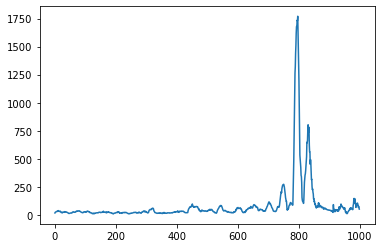

In [19]:
plt.plot(Errors_A[2])
Errors_A.mean()

0    1717.391383
1      35.413663
2      28.307142
dtype: float64

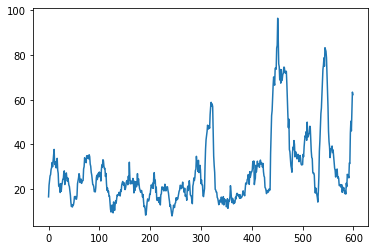

In [18]:
plt.plot(Errors_A.iloc[:600,2:3])
Errors_A.iloc[:600,:].mean()

In [ ]:
# X=dat.iloc[:, 16:]
# Y=dat.iloc[:, 0:16]

# X_train=X.iloc[25000:40000,:]
# Y_train=Y.iloc[25000:40000,:]


In [ ]:
# def hyperParameterTuning(X_train, Y_train):
#        param_tuning = {'bootstrap': [True],
#                    'max_depth': [30, 35],
#                    'max_features': [35],
#                    'min_samples_leaf' : [4],
#                    'min_samples_split' : [5],
#                    'n_estimators': [ 200, 250, 300]
#                   }

#        RF_Regressor = RandomForestRegressor()

#        gsearch = GridSearchCV(estimator = RF_Regressor,
#                           param_grid = param_tuning,                        
# #                            scoring = 'neg_mean_absolute_error', #MAE
#                            scoring = 'neg_mean_squared_error',  #MSE
#                           cv = 5,
#                           n_jobs = -1,
#                           verbose = 1)

#        gsearch.fit(X_train,Y_train)
#        return gsearch.best_params_

# hyperParameterTuning(X_train, Y_train)